In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/dataset/util.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, Sequence
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [17]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

In [5]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


In [6]:
%matplotlib inline

In [7]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [8]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [9]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

01/28/2020 15:45:53 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 15:46:14 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 15:51:01 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 15:51:22 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 15:56:08 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub23_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 15:56:28 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub25_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 16:01:17 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 16:01:38 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

In [10]:
dtfa.load_state('data/affvids_mc_norest_rz_k100_n1000_01232020_000625') 

In [11]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz', num_factors=100)

01/28/2020 16:08:52 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 16:09:09 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 16:13:21 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 16:13:40 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 16:18:18 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub23_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 16:18:38 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub25_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 16:23:28 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 16:23:48 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

In [12]:
htfa.load_state('data/affvids_norest_k100_n1000_01242020_230748')

In [34]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

def high_low_labeler(task):
    if 'high' in task:
        return 'high'
    elif 'low' in task:
        return 'low'
    else:
        return None

In [32]:
def block_task_labeler(block):
    return task_labeler(block.task)

def block_high_low_labeler(block):
    if 'high' in block.task:
        return 'high'
    elif 'low' in block.task:
        return 'low'
    else:
        return None

In [15]:
def subject_labeler(subject):
    return 'Subject %d' % subject

In [18]:
def block_subject_labeler(block):
    return subject_labeler(block.subject)

In [53]:
def classification_pipeline(data,targets,scoring="roc_auc",input_data=False,print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    feature_selection = SelectPercentile(f_classif, percentile=5)
    for category in categories:
        print("Processing %s" % (category))
        svc = SVC(C=1., kernel="linear")
        if input_data:
            classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
        else:
            classifier = svc
        dummy_classifier = DummyClassifier()

        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance

In [54]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()


In [55]:
### task classification using leave one out runs on NTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_weights_dtfa[i,:,:].mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance

Processing Subject 10
Processing Heights
Scores: 0.9896 +- 0.0147
Chance Scores: 0.5417 +- 0.0780
Processing Social threat
Scores: 0.9479 +- 0.0531
Chance Scores: 0.5000 +- 0.0000
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4375 +- 0.1021
...
Overall Score: 0.9792 +- 0.0390
Overall Dummy Score: 0.4931 +- 0.0856


Processing Subject 11
Processing Heights
Scores: 0.8542 +- 0.1405
Chance Scores: 0.5833 +- 0.2125
Processing Social threat
Scores: 0.8854 +- 0.0531
Chance Scores: 0.4167 +- 0.0780
Processing Spiders
Scores: 0.8646 +- 0.0820
Chance Scores: 0.4583 +- 0.0780
...
Overall Score: 0.8681 +- 0.0997
Overall Dummy Score: 0.4861 +- 0.1553


Processing Subject 12
Processing Heights
Scores: 0.5000 +- 0.1276
Chance Scores: 0.4792 +- 0.1559
Processing Social threat
Scores: 0.5312 +- 0.1021
Chance Scores: 0.4792 +- 0.0780
Processing Spiders
Scores: 0.4896 +- 0.1284
Chance Scores: 0.4583 +- 0.0780
...
Overall Score: 0.5069 +- 0.1213
Overall Dummy Score: 0.4722 +- 0.1107


Proc

In [56]:
### task classification using leave one out runs on HTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_weights_htfa[i,:,:].mean(0))
            targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

htfa_summary_result = summary_result

Processing Subject 10
Processing Heights
Scores: 0.9271 +- 0.0390
Chance Scores: 0.4583 +- 0.1559
Processing Social threat
Scores: 0.9375 +- 0.0442
Chance Scores: 0.4167 +- 0.1473
Processing Spiders
Scores: 0.9479 +- 0.0390
Chance Scores: 0.5625 +- 0.0884
...
Overall Score: 0.9375 +- 0.0417
Overall Dummy Score: 0.4792 +- 0.1473


Processing Subject 11
Processing Heights
Scores: 0.6875 +- 0.0510
Chance Scores: 0.6042 +- 0.0589
Processing Social threat
Scores: 0.8125 +- 0.0920
Chance Scores: 0.5000 +- 0.0884
Processing Spiders
Scores: 0.7396 +- 0.1405
Chance Scores: 0.5417 +- 0.0780
...
Overall Score: 0.7465 +- 0.1136
Overall Dummy Score: 0.5486 +- 0.0873


Processing Subject 12
Processing Heights
Scores: 0.5104 +- 0.1405
Chance Scores: 0.5417 +- 0.0295
Processing Social threat
Scores: 0.6250 +- 0.0675
Chance Scores: 0.4375 +- 0.0510
Processing Spiders
Scores: 0.5208 +- 0.0966
Chance Scores: 0.4375 +- 0.0510
...
Overall Score: 0.5521 +- 0.1179
Overall Dummy Score: 0.4722 +- 0.0666


Proc

In [57]:
### task classification using leave one out runs on input data###
summary_result = []
summary_result_chance = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   input_data=True,
                                                                   print_all=True)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

voxel_summary_result = summary_result

Processing Subject 10
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9583 +- 0.0589
Chance Scores: 0.4375 +- 0.0884
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0510
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.3542 +- 0.0295
...
Overall Score: 0.9861 +- 0.0393
Overall Dummy Score: 0.4306 +- 0.0856


Processing Subject 11
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8854 +- 0.1405
Chance Scores: 0.3542 +- 0.1792
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9479 +- 0.0390
Chance Scores: 0.5625 +- 0.1350
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9167 +- 0.0780
Chance Scores: 0.4167 +- 0.0295
...
Overall Score: 0.9167 +- 0.0988
Overall Dummy Score: 0.4444 +- 0.1571


Processing Subject 12
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.2708 +- 0.1031
Chance Scores: 0.5208 +- 0.0589
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.6771 +- 0.0780
Chance Scores: 0.5417 +- 0.1284
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.5833 +- 0.1982
Chance Scores: 0.4583 +- 0.0295
...
Overall Score: 0.5104 +- 0.2210
Overall Dummy Score: 0.5069 +- 0.0905


Processing Subject 13
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9062 +- 0.0675
Chance Scores: 0.4583 +- 0.1559
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9896 +- 0.0147
Chance Scores: 0.5417 +- 0.0780
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9062 +- 0.0675
Chance Scores: 0.5000 +- 0.0510
...
Overall Score: 0.9340 +- 0.0682
Overall Dummy Score: 0.5000 +- 0.1102


Processing Subject 14
Processing Heights
Scores: 0.8750 +- 0.0000
Chance Scores: 0.2812 +- 0.0938
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.9062 +- 0.0312
Chance Scores: 0.3750 +- 0.0625
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1250
...
Overall Score: 0.9271 +- 0.0561
Overall Dummy Score: 0.3854 +- 0.1322


Processing Subject 15
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9375 +- 0.0675
Chance Scores: 0.5417 +- 0.2062
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9167 +- 0.0780
Chance Scores: 0.5208 +- 0.0589
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9167 +- 0.0780
Chance Scores: 0.4375 +- 0.0510
...
Overall Score: 0.9236 +- 0.0753
Overall Dummy Score: 0.5000 +- 0.1350


Processing Subject 16
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9688 +- 0.0442
Chance Scores: 0.3958 +- 0.0780
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9896 +- 0.0147
Chance Scores: 0.6458 +- 0.1062
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9896 +- 0.0147
Chance Scores: 0.5000 +- 0.0510
...
Overall Score: 0.9826 +- 0.0299
Overall Dummy Score: 0.5139 +- 0.1310


Processing Subject 17
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9688 +- 0.0255
Chance Scores: 0.5417 +- 0.1062
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9271 +- 0.0531
Chance Scores: 0.4375 +- 0.1531
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8438 +- 0.0675
Chance Scores: 0.5208 +- 0.0589
...
Overall Score: 0.9132 +- 0.0733
Overall Dummy Score: 0.5000 +- 0.1215


Processing Subject 18
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7962 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8021 +- 0.0295
Chance Scores: 0.5000 +- 0.1840
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7962 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.6667 +- 0.0531
Chance Scores: 0.4167 +- 0.1473
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7962 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8229 +- 0.0966
Chance Scores: 0.4167 +- 0.0295
...
Overall Score: 0.7639 +- 0.0956
Overall Dummy Score: 0.4444 +- 0.1427


Processing Subject 19
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8958 +- 0.0531
Chance Scores: 0.6250 +- 0.0510
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.1473
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8750 +- 0.0510
Chance Scores: 0.5833 +- 0.0295
...
Overall Score: 0.9236 +- 0.0693
Overall Dummy Score: 0.5556 +- 0.1158


Processing Subject 23
Processing Heights
Scores: 0.6719 +- 0.0469
Chance Scores: 0.3750 +- 0.0625
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7054  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7054  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.7969 +- 0.0156
Chance Scores: 0.6562 +- 0.0312
Processing Spiders
Scores: 0.9062 +- 0.0625
Chance Scores: 0.5938 +- 0.0312
...
Overall Score: 0.7917 +- 0.1062
Overall Dummy Score: 0.5417 +- 0.1284


Processing Subject 25
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7961 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8646 +- 0.0531
Chance Scores: 0.6250 +- 0.0510
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7961 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9583 +- 0.0295
Chance Scores: 0.4375 +- 0.1840
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7961 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9896 +- 0.0147
Chance Scores: 0.5000 +- 0.1350
...
Overall Score: 0.9375 +- 0.0642
Overall Dummy Score: 0.5208 +- 0.1559


Processing Subject 26
Processing Heights
Scores: 0.8125 +- 0.1562
Chance Scores: 0.3750 +- 0.0625
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7893  7929 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7893  7929 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.7969 +- 0.1406
Chance Scores: 0.6562 +- 0.0312
Processing Spiders
Scores: 0.8438 +- 0.0938
Chance Scores: 0.5938 +- 0.1562
...
Overall Score: 0.8177 +- 0.1343
Overall Dummy Score: 0.5417 +- 0.1559


Processing Subject 28
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8750 +- 0.0442
Chance Scores: 0.4792 +- 0.1640
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9688 +- 0.0255
Chance Scores: 0.4583 +- 0.1284
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.9479 +- 0.0607
Overall Dummy Score: 0.4792 +- 0.1350


Processing Subject 29
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9062 +- 0.0675
Chance Scores: 0.2500 +- 0.1021
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9792 +- 0.0295
Chance Scores: 0.5208 +- 0.0780
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9896 +- 0.0147
Chance Scores: 0.5625 +- 0.1768
...
Overall Score: 0.9583 +- 0.0571
Overall Dummy Score: 0.4444 +- 0.1874


Processing Subject 4
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8750 +- 0.0000
Chance Scores: 0.7292 +- 0.1179
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9583 +- 0.0295
Chance Scores: 0.4583 +- 0.1640
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9479 +- 0.0531
Chance Scores: 0.5000 +- 0.0510
...
Overall Score: 0.9271 +- 0.0510
Overall Dummy Score: 0.5625 +- 0.1693


Processing Subject 5
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9062 +- 0.0675
Chance Scores: 0.4167 +- 0.1062
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9688 +- 0.0255
Chance Scores: 0.5625 +- 0.1840
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9896 +- 0.0147
Chance Scores: 0.5833 +- 0.1284
...
Overall Score: 0.9549 +- 0.0553
Overall Dummy Score: 0.5208 +- 0.1614


Processing Subject 6
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.4271 +- 0.1538
Chance Scores: 0.5000 +- 0.1021
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.2500 +- 0.0442
Chance Scores: 0.5000 +- 0.1350
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.5729 +- 0.1062
Chance Scores: 0.5625 +- 0.0884
...
Overall Score: 0.4167 +- 0.1724
Overall Dummy Score: 0.5208 +- 0.1141


Processing Subject 7
Processing Heights
Scores: 0.3750 +- 0.0312
Chance Scores: 0.6250 +- 0.0000
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.3438 +- 0.0938
Chance Scores: 0.3750 +- 0.1250
Processing Spiders
Scores: 0.3438 +- 0.0000
Chance Scores: 0.6250 +- 0.0625
...
Overall Score: 0.3542 +- 0.0589
Overall Dummy Score: 0.5417 +- 0.1428


Processing Subject 8
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.9688 +- 0.0255
Chance Scores: 0.5833 +- 0.1473
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.8750 +- 0.0920
Chance Scores: 0.4583 +- 0.1062
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.1284
...
Overall Score: 0.9479 +- 0.0765
Overall Dummy Score: 0.5000 +- 0.1413


Processing Subject 9
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.5000 +- 0.1993
Chance Scores: 0.4375 +- 0.0884
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.4167 +- 0.0147
Chance Scores: 0.4583 +- 0.0589
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.6250 +- 0.1926
Chance Scores: 0.4583 +- 0.0780
...
Overall Score: 0.5139 +- 0.1817
Overall Dummy Score: 0.4514 +- 0.0767


...
Voxel Summary Score Across Subjects, Across Tasks: 0.8332 +- 0.2147
Overall Dummy Score: 0.50 +- 0.14


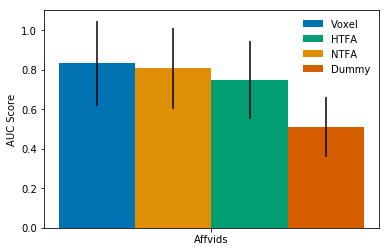

In [58]:
voxel_accuracies = np.mean(voxel_summary_result)
voxel_errs = np.std(voxel_summary_result)
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies.pdf')